This notebook was copied from the one used to make the figure for the RSI paper.

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

import thesis
chapter = 'theory'
save = True

from scipy.constants import e, k as k_B
from thesis.constants import aluminum, BCS
import lmfit

Values derived from fits to the data for the same 9-element chip:

In [2]:
data_directory = '../../paper/2014_McCarrick_LEKID/'
tau_9_good = np.load(data_directory + 'nine-element_pulse_good.npy')
tau_9_good[6] = False # This point has neighbors at 10 mK on either side and doesn't add much.
T_9 = np.load(data_directory + 'nine-element_pulse_T.npy')[tau_9_good]
tau_9 = np.load(data_directory + 'nine-element_pulse_tau.npy')[tau_9_good]
tau_9_error = np.load(data_directory + 'nine-element_pulse_tau_error.npy')[tau_9_good]

In [3]:
def thermal_quasiparticle_density(T):
    N0 = aluminum['N0_per_eV_per_um3']
    Tc = 1.46
    k_eV = k_B / e
    Delta = BCS * k_eV * Tc
    return 4 * N0 * Delta * (np.pi * k_eV * T / (2 * Delta))**(1 / 2) * np.exp(-Delta / (k_eV * T))

def tau_qp(T, R):
    return R / thermal_quasiparticle_density(T)

tau_qp_model = lmfit.Model(tau_qp)
tau_qp_model.independent_vars

['T']

In [4]:
# This doesn't fit well at all
start_index = 3
result = tau_qp_model.fit(tau_9[start_index:], T=T_9[start_index:], R=10)

In [5]:
TT = np.linspace(0.01, 0.4, 1000)

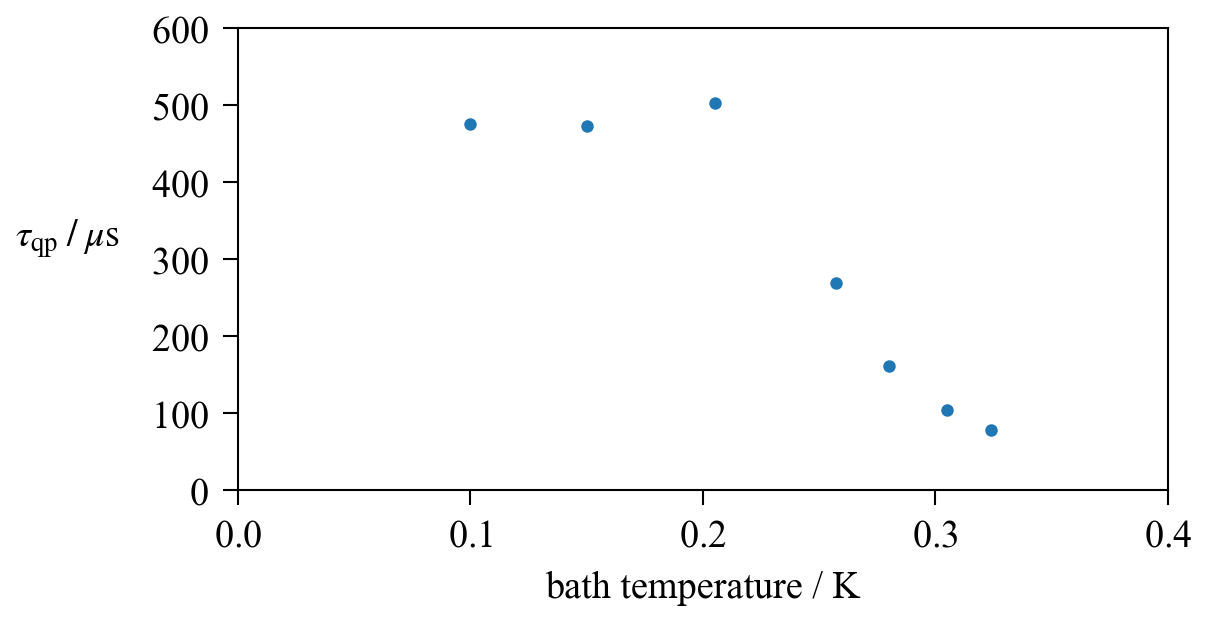

In [6]:
fig, ax = plt.subplots(figsize=(4, 2))

#ax.plot(TT, result.eval(params=result.params, T=TT), linestyle='-', color='gray')
ax.plot(T_9, tau_9, 'o')
xticks = np.linspace(0, 0.4, 5)
ax.set_xlim(xticks[0], xticks[-1])
ax.set_xticks(xticks)
ax.set_ylim(0, 600)
ax.set_xlabel('bath temperature / K')
ax.set_ylabel(r'$\tau_\mathrm{qp} \;  / \; \mu \mathrm{s}$', rotation='horizontal', labelpad=20)

if save:
    fig.savefig(thesis.full_filename(chapter, 'tau_qp_vs_bath_temperature.pdf'))